In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as lines
import mplhep as hep
import numpy as np
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

def flat(x,axis=None):
        try:
            return ak.to_numpy(ak.flatten(x,axis=axis)) 
        except:
            return x

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kshort_pn_4GeV_Jun13_ntuple/*.root")

In [3]:
hists = {}
hists["Target_kaone_hist"] = hist.Hist("TSP Pions",
                                hist.Cat("Ktype", "Type of Kaons"),      
                                hist.Bin("k", r"Kaon Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )

In [4]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    sim_kaon = ldmx_events['Sim_Kaon']
    
    masks_id = {'Kshort': 310,
                'Klong': 130,
                'Kpm': 321,
               }
    masses = {'Kshort': 497.648,
              'Klong': 497.648,
              'Kpm': 493.677
             }
    
    for part,pmask in masks_id.items():
        part_mask = (abs(sim_kaon.pdgID) == pmask)
        hists["Target_kaone_hist"].fill(Ktype = part,
                                     k = flat(sim_kaon[part_mask].e - masses[part]),
                                     e = flat(sim_kaon[part_mask].electrone),
                                    )
        # works, but try again
#y0 = -x
#y1 = (-2.45*(x)+2150)80% is above
#y2 = (-2.00*(x)+2150)70% is above
#y3 = (-1.75*(x)+2150)60% is above
#y4 = (-1.50*(x)+2150)50% is above
#y5 = (-1.30*(x)+2150)40% is above
#y6 = (-0.90*(x)+2150)20% is above
#y7 = -0.97* x + 3350 3% is above
#y8 = -1*x+3350

#y0 = -x
#y1 = (-4.35*(x)+2150)80% is above
#y2 = (-3.35*(x)+2150)60% is above
#y3 = (-2.50*(x)+2150)40% is above
#y4 = (-1.75*(x)+3350)20% is above
#y5 = (-0.97*(x)+3350)3% is above
#y6 = -1*x+3350


    ytestmask = ((-4.35*(sim_kaon.e)+3350) <= (sim_kaon.electrone))       
    acceptance =100*flat((flat(sim_kaon[ytestmask].e).shape)/(flat((flat(sim_kaon.e).shape))))
                           
    #print('ytest mask',flat(sim_kaon[ytestmask].e).shape)    
    #print('actual size',flat(sim_kaon.e).shape) 
    #print('acceptance',100*flat((flat(sim_kaon[ytestmask].e).shape)/(flat((flat(sim_kaon.e).shape)))), '%')  
    return acceptance

In [5]:
nchunk = 0
percent = 0
for chunk in ldmx_dict:
    # I usually test my code in one chunck only
    #if nchunk >= 1: break
    nchunk += 1
    returna = ProcessChunk(chunk, hists)
    percent += returna[0]
    print('process', nchunk, 'percent', percent/nchunk)

process 1 percent 85.0210970464135
process 2 percent 83.52709698656372
process 3 percent 82.4665887757797
process 4 percent 82.34499108678526
process 5 percent 82.27512519046942
process 6 percent 81.37741914020599
process 7 percent 81.08994202947362
process 8 percent 81.09015151750482
process 9 percent 80.47144819687968
process 10 percent 80.48736644025477
process 11 percent 80.48880082333052
process 12 percent 80.55676307356023
process 13 percent 80.4018205387831
process 14 percent 80.27892754896422
process 15 percent 80.42431087365692
process 16 percent 80.3468864666778
process 17 percent 80.28971667452028
process 18 percent 80.35875555387732
process 19 percent 80.2661894720943
process 20 percent 80.24287999848958
process 21 percent 80.0660095035864
process 22 percent 79.90372391232005
process 23 percent 79.83916215173237
process 24 percent 79.7484385373726
process 25 percent 79.76858502949115
process 26 percent 79.87707351736786
process 27 percent 79.91125597968758
process 28 percen

<Hist (Ktype,k,e) instance at 0x12caa4190>


Text(1, 0, 'Kaon Kinetic Energy (MeV)')

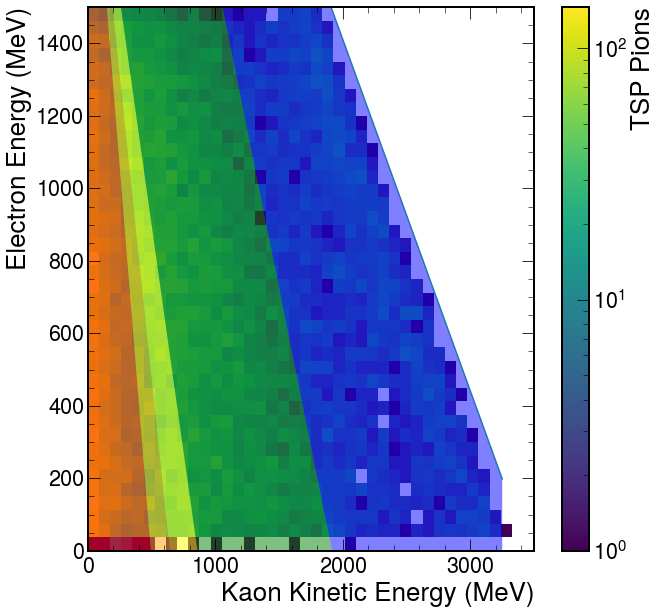

In [6]:
print(hists["Target_kaone_hist"])

fig, ax = plt.subplots()
hist.plot2d(hists["Target_kaone_hist"].integrate('Ktype', ['Kshort']), xaxis='k', ax=ax, patch_opts=POPTS);
x = np.arange(0, 3250, 1)
ytest = -0.97* x + 3350
#ax.plot(x, ytest, '-')

#y0 = -x
#y1 = (-4.35*(x)+2150)80% is above
#y2 = (-3.35*(x)+2150)60% is above
#y3 = (-2.50*(x)+2150)40% is above
#y4 = (-1.75*(x)+3350)20% is above
#y5 = (-0.97*(x)+3350)3% is above
#y6 = -1*x+3350

y0 = -x
y1 = (-4.35*(x)+2150)
y2 = (-3.35*(x)+2150)
y3 = (-2.50*(x)+2150)
y4 = (-1.75*(x)+3350)
y5 = (-0.97*(x)+3350)
y6 = (3350)
ax.plot(x, y5, '-')

ax.fill_between(x, y0, y1, where=(y1 > y0), facecolor='red', alpha=0.5)
ax.fill_between(x, y1, y2, where=(y2 > y1), facecolor='orange', alpha=0.5)
ax.fill_between(x, y2, y3, where=(y3 > y2), facecolor='yellow', alpha=0.5)
ax.fill_between(x, y3, y4, where=(y4 > y3), facecolor='green', alpha=0.5)
ax.fill_between(x, y4, y5, where=(y5 > y4), facecolor='blue', alpha=0.5)
#ax.fill_between(x, y5, y6, where=(y6 > y5), facecolor='yellow', alpha=0.5)
ax.set_ylabel('Electron Energy (MeV)', loc='top')
ax.set_xlabel('Kaon Kinetic Energy (MeV)', loc='right')
#ax.text(200, 200, '20%')
#ax.text(1200, 200, '20%')
#ax.text(2500, 200, '20%')

<Hist (Ktype,k,e) instance at 0x12caa4190>


Text(2500, 200, '20%')

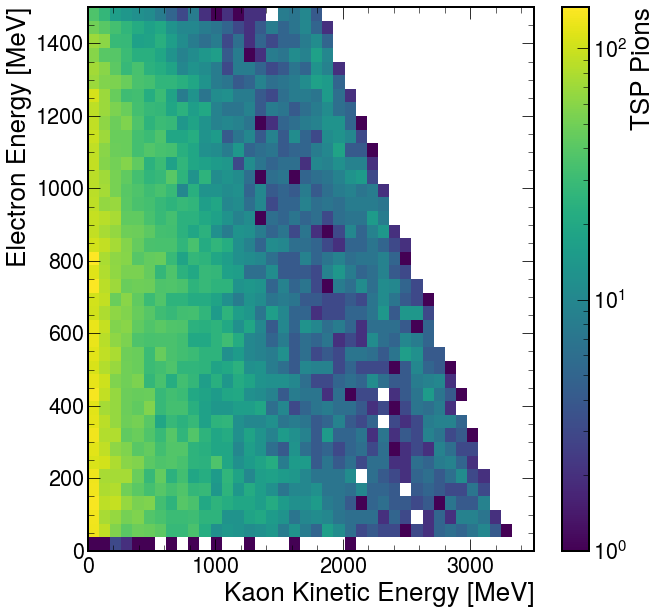

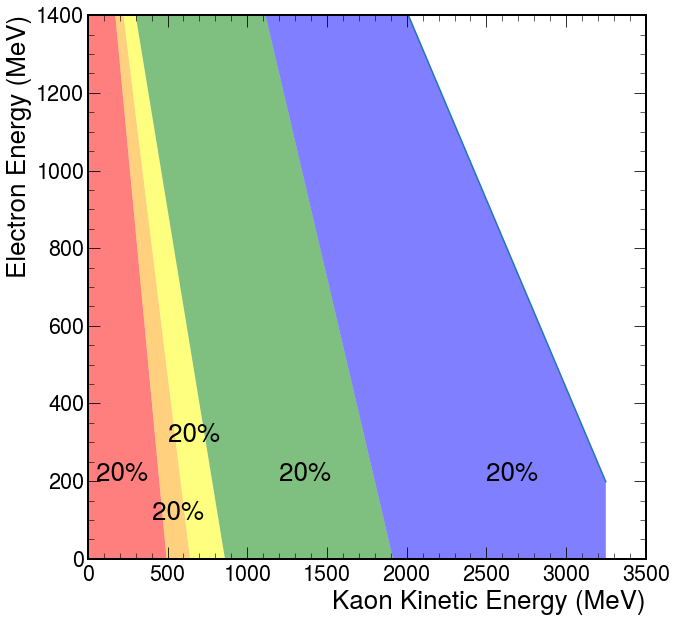

In [7]:
print(hists["Target_kaone_hist"])

fig, ax = plt.subplots()
hist.plot2d(hists["Target_kaone_hist"].integrate('Ktype', ['Kshort']), xaxis='k', ax=ax, patch_opts=POPTS);
x = np.arange(0, 3250, 1)
ytest = (-1.25*(x)+2660)
#ax.plot(x, ytest, '-')


fig, ax = plt.subplots()
ax.set_xlim(0, 3500)
ax.set_ylim(0, 1400)
y0 = -x
y1 = (-4.35*(x)+2150)
y2 = (-3.35*(x)+2150)
y3 = (-2.50*(x)+2150)
y4 = (-1.75*(x)+3350)
y5 = (-0.97*(x)+3350)
y6 = (3350)
ax.plot(x, y5, '-')

ax.fill_between(x, y0, y1, where=(y1 > y0), facecolor='red', alpha=0.5)
ax.fill_between(x, y1, y2, where=(y2 > y1), facecolor='orange', alpha=0.5)
ax.fill_between(x, y2, y3, where=(y3 > y2), facecolor='yellow', alpha=0.5)
ax.fill_between(x, y3, y4, where=(y4 > y3), facecolor='green', alpha=0.5)
ax.fill_between(x, y4, y5, where=(y5 > y4), facecolor='blue', alpha=0.5)
#ax.fill_between(x, y5, y6, where=(y6 > y5), facecolor='yellow', alpha=0.5)
ax.set_ylabel('Electron Energy (MeV)', loc='top')
ax.set_xlabel('Kaon Kinetic Energy (MeV)', loc='right')
ax.text(50, 200, '20%')
ax.text(400, 100, '20%')
ax.text(500, 300, '20%')
ax.text(1200, 200, '20%')
ax.text(2500, 200, '20%')


